Importing the Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

Data Collection and Processing

In [ ]:
# loading the data from csv file to pandas dataframe
car_dataset=pd.read_csv('/content/car data.csv')

In [ ]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [ ]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# checking the number of missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
# describe numerical features
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [ ]:
# encoding 'Fuel_Type' column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding 'Seller_Type' column
car_dataset.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

# encoding 'Transmission' column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1,}},inplace=True)



In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,1,0,0


Splitting the Data and Target

In [ ]:
# Add Car_Age feature
car_dataset['Car_Age'] = 2025 - car_dataset['Year']
X = car_dataset.drop(['Car_Name','Selling_Price','Year'], axis=1)

Y=car_dataset['Selling_Price']
print(car_dataset.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  Car_Age  
0            1             0      0       11  
1            1             0      0       12  
2            1             0      0        8  
3            1             0      0       14  
4            1             0      0       11  


In [ ]:
print(X)
print(X.head())


     Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  \
0             5.59       27000          0            1             0      0   
1             9.54       43000          1            1             0      0   
2             9.85        6900          0            1             0      0   
3             4.15        5200          0            1             0      0   
4             6.87       42450          1            1             0      0   
..             ...         ...        ...          ...           ...    ...   
296          11.60       33988          1            1             0      0   
297           5.90       60000          0            1             0      0   
298          11.00       87934          0            1             0      0   
299          12.50        9000          1            1             0      0   
300           5.90        5464          0            1             0      0   

     Car_Age  
0         11  
1         12  
2     

In [ ]:
print(Y)
print(Y.head())

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


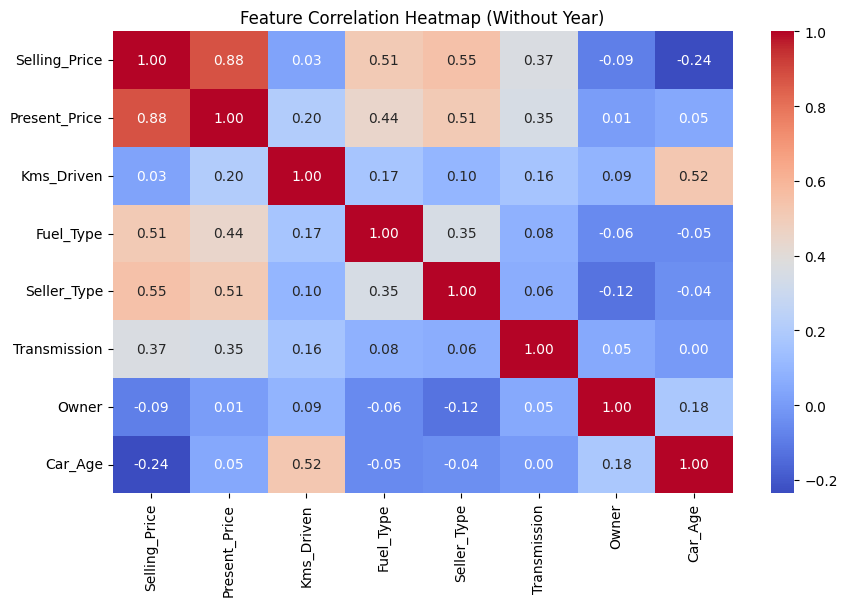

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(car_dataset.drop(['Car_Name', 'Year'], axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap (Without Year)")
plt.show()


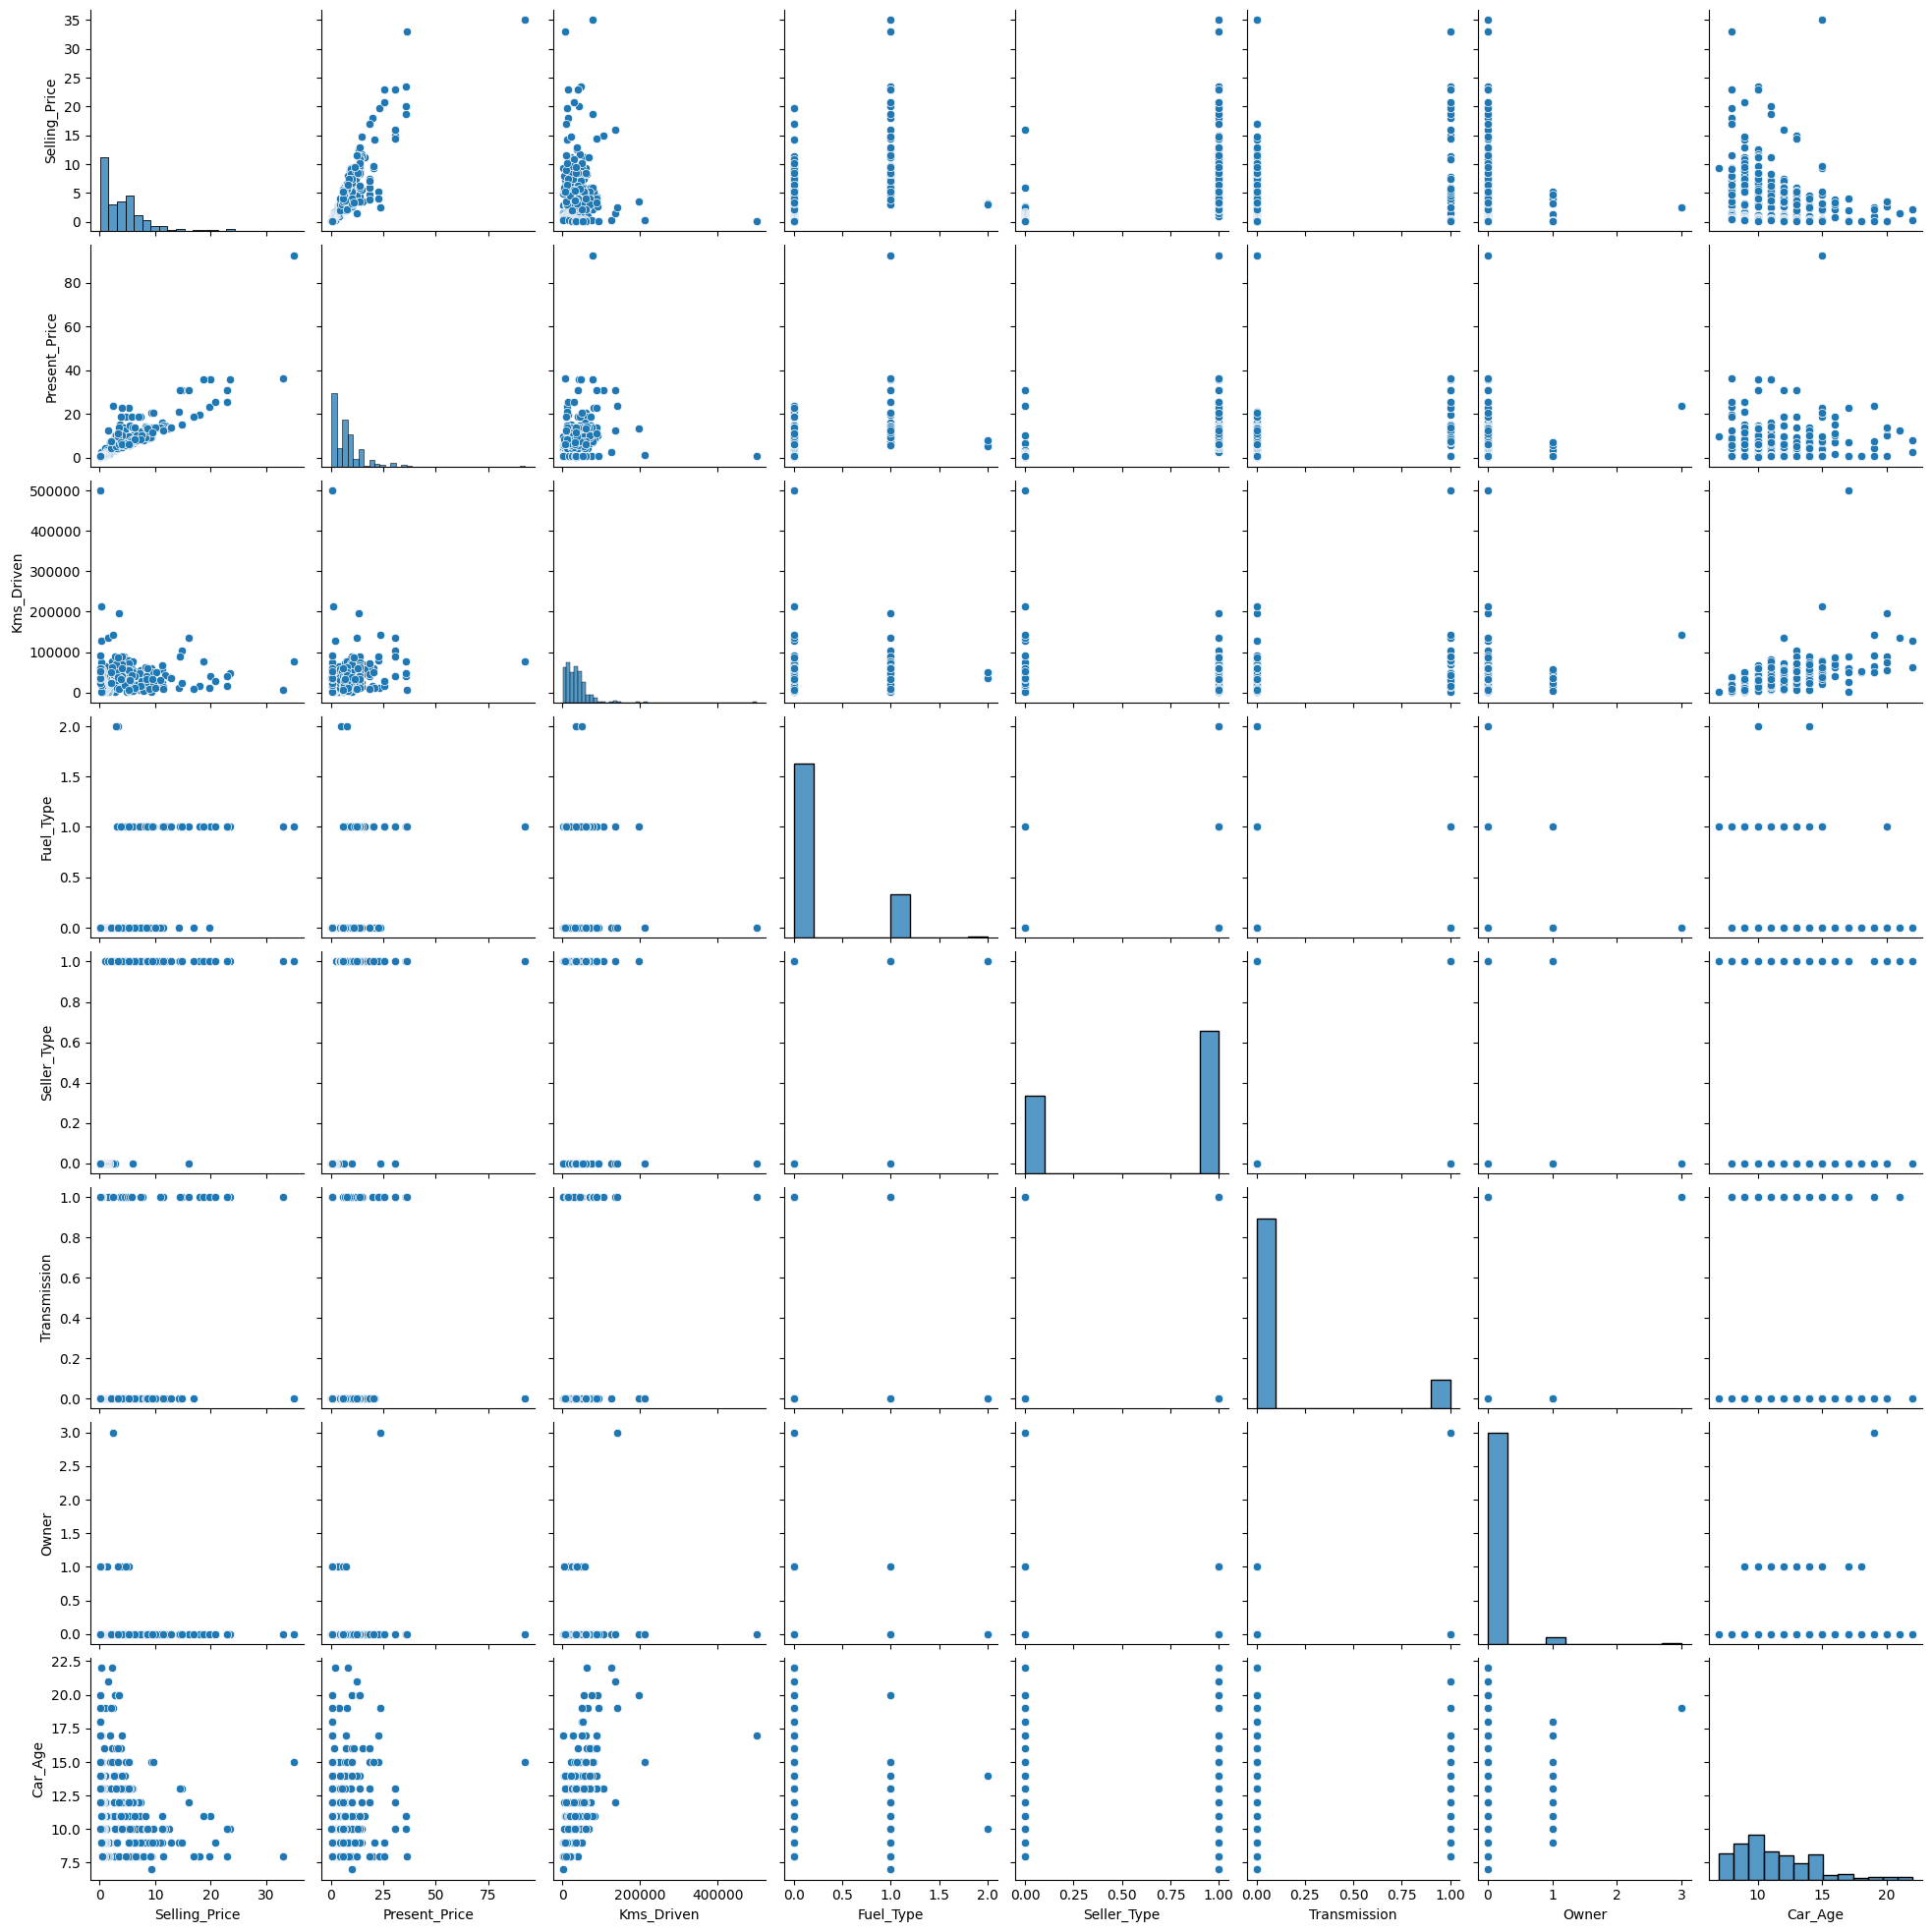

In [ ]:
# Pairplot
sns.pairplot(car_dataset.drop(['Car_Name', 'Year'], axis=1))
plt.show()


Splitting Training and Test Data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (270, 7)
Testing set size: (31, 7)


Model Training

1.Linear Regression

In [ ]:
# loading the Linear Regression model
lin_reg_model=LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on Training Data
training_data_prediction=lin_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.8799451660493707


Visualise the Actual Prices and Predicted Prices

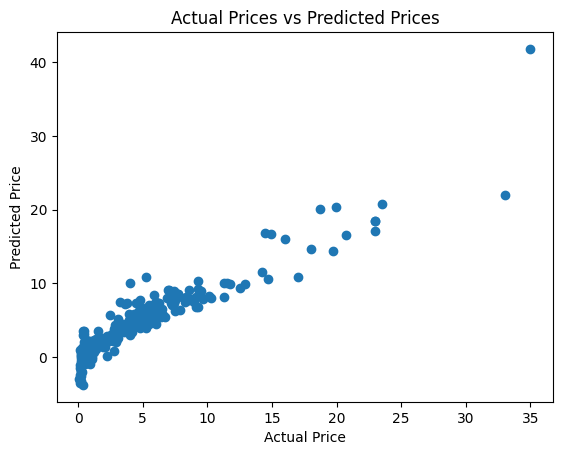

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Test Data
test_data_prediction=lin_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.8365766715024977


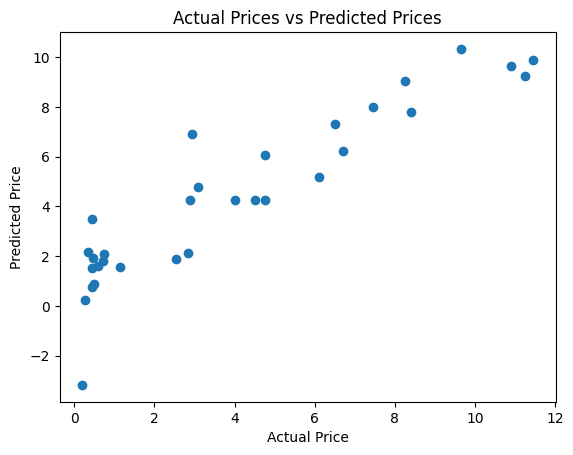

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training Data
training_data_prediction = lin_reg_model.predict(X_train)

# prediction on Test Data
test_data_prediction = lin_reg_model.predict(X_test)

# Evaluation Metrics
print("Linear Regression Model Evaluation:")
print("R squared Error (Train):", metrics.r2_score(Y_train, training_data_prediction))
print("R squared Error (Test):", metrics.r2_score(Y_test, test_data_prediction))
print("MAE:", mean_absolute_error(Y_test, test_data_prediction))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, test_data_prediction)))


Linear Regression Model Evaluation:
R squared Error (Train): 0.8799451660493707
R squared Error (Test): 0.8365766715024977
MAE: 1.1516382156622789
RMSE: 1.466332131198917


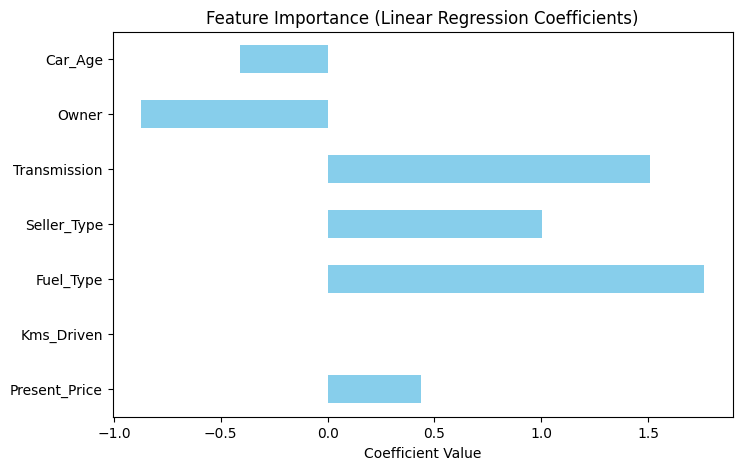

Feature Importances:
 Present_Price    0.438729
Kms_Driven      -0.000007
Fuel_Type        1.763083
Seller_Type      1.004177
Transmission     1.507363
Owner           -0.874133
Car_Age         -0.409426
dtype: float64


In [ ]:
# Feature Importance (Linear Regression Coefficients)
importance = pd.Series(lin_reg_model.coef_, index=X.columns)
importance.plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.show()

print("Feature Importances:\n", importance)


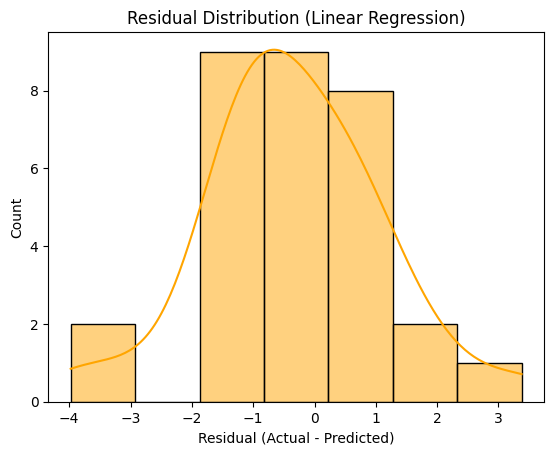

In [ ]:
# Residual Analysis for Linear Regression
residuals = Y_test - test_data_prediction
sns.histplot(residuals, kde=True, color='orange')
plt.title("Residual Distribution (Linear Regression)")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()


2. Lasso

In [ ]:
# loading the Lasso model
lass_reg_model=Lasso(alpha=0.01)

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso(alpha=0.01)

Model Evaluation

In [ ]:
# prediction on Training Data
training_data_prediction=lass_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.8798046591864435


Visualise the Actual Prices and Predicted Prices

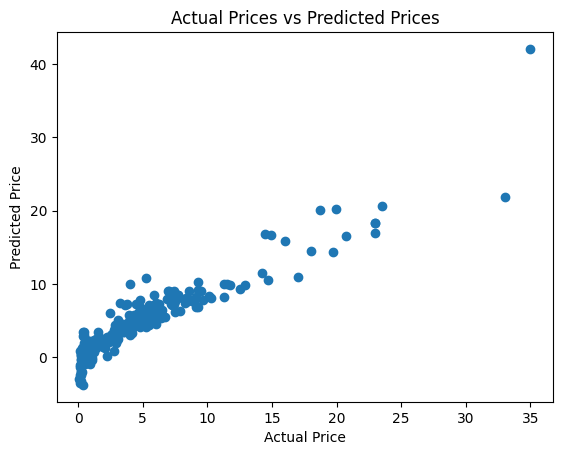

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Test Data
test_data_prediction=lass_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.8429087486915141


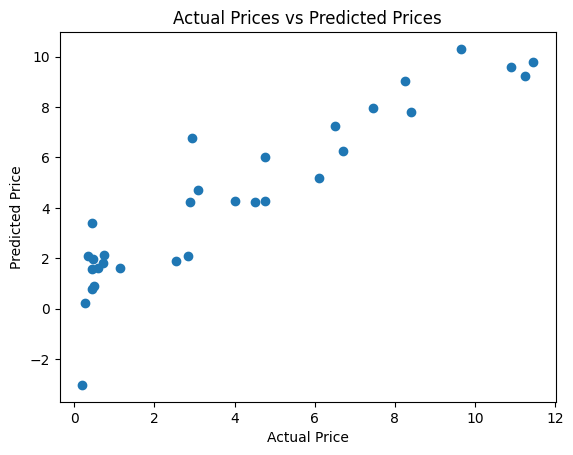

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training Data
training_data_prediction = lass_reg_model.predict(X_train)

# prediction on Test Data
test_data_prediction = lass_reg_model.predict(X_test)

# Evaluation Metrics
print("Lasso Regression Model Evaluation:")
print("R squared Error (Train):", metrics.r2_score(Y_train, training_data_prediction))
print("R squared Error (Test):", metrics.r2_score(Y_test, test_data_prediction))
print("MAE:", mean_absolute_error(Y_test, test_data_prediction))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, test_data_prediction)))


Lasso Regression Model Evaluation:
R squared Error (Train): 0.8798046591864435
R squared Error (Test): 0.8429087486915141
MAE: 1.139464555795469
RMSE: 1.437643896570481


Model Performance Comparison

               Model  R2 Score       MAE      RMSE
0  Linear Regression  0.836577  1.151638  1.466332
1   Lasso Regression  0.842909  1.139465  1.437644
2      Random Forest  0.981489  0.330968  0.493506


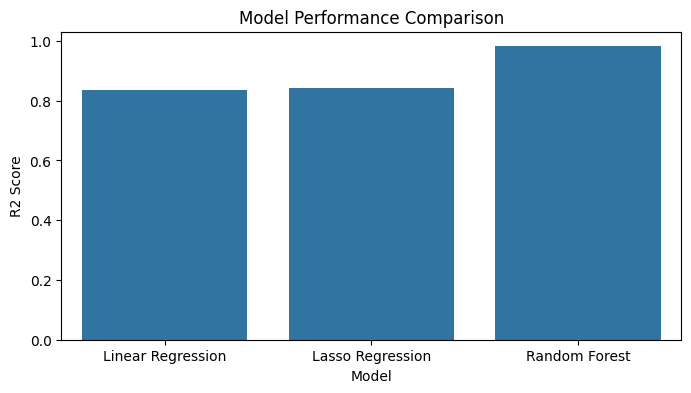

In [ ]:
# Train Random Forest
rf_model = RandomForestRegressor(random_state=2)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate
r2_rf = metrics.r2_score(Y_test, rf_pred)
mae_rf = metrics.mean_absolute_error(Y_test, rf_pred)
rmse_rf = np.sqrt(metrics.mean_squared_error(Y_test, rf_pred))

# Store previous results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Random Forest'],
    'R2 Score': [metrics.r2_score(Y_test, lin_reg_model.predict(X_test)),
                 metrics.r2_score(Y_test, lass_reg_model.predict(X_test)),
                 r2_rf],
    'MAE': [metrics.mean_absolute_error(Y_test, lin_reg_model.predict(X_test)),
            metrics.mean_absolute_error(Y_test, lass_reg_model.predict(X_test)),
            mae_rf],
    'RMSE': [np.sqrt(metrics.mean_squared_error(Y_test, lin_reg_model.predict(X_test))),
             np.sqrt(metrics.mean_squared_error(Y_test, lass_reg_model.predict(X_test))),
             rmse_rf]
})

print(results)

# Visualize comparison
plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='R2 Score', data=results)
plt.title("Model Performance Comparison")
plt.show()


SELECT and SAVE BEST MODEL

In [ ]:
best_model_name = results.loc[results['R2 Score'].idxmax(), 'Model']
print(f"Best performing model: {best_model_name}")

if best_model_name == 'Random Forest':
    final_model = rf_model
elif best_model_name == 'Lasso Regression':
    final_model = lass_reg_model
else:
    final_model = lin_reg_model

# Save model
joblib.dump(final_model, 'car_price_model_final.pkl')
print("Model saved as 'car_price_model_final.pkl' successfully!")
model = joblib.load('car_price_model_final.pkl')
print(f"Loaded best model successfully: {best_model_name}")


Best performing model: Random Forest
Model saved as 'car_price_model_final.pkl' successfully!
Loaded best model successfully: Random Forest


In [ ]:
model = joblib.load('car_price_model_final.pkl')
def predict_car_price_from_features(features):
    """
    Predicts car selling price using given feature list.
    Parameters:
    features = [Present_Price, Kms_Driven, Owner, Fuel_Type, Seller_Type, Transmission,Car_Age]

    """
    prediction = model.predict([features])[0]
    prediction = max(0, prediction)
    return (round(prediction-0.5, 2), round(prediction+0.5, 2))


In [ ]:
def predict_car_price():
    """Takes car details from user and prints predicted selling price with input validation."""

    print("Enter car details:")

    # Year of Manufacture
    while True:
        try:
            Year = int(input("Year of Manufacture (e.g., 2014): "))
            if 1900 <= Year <= 2025:
                break
            else:
                print("Invalid input value. Please enter a year between 1900 and 2025.")
        except ValueError:
            print("Invalid input value. Please enter a valid integer year.")

    # Present Price
    while True:
        try:
            Present_Price = float(input("Present Price in Lakhs (e.g., 5.59): "))
            if Present_Price >= 0:
                break
            else:
                print("Invalid input value. Price must be non-negative.")
        except ValueError:
            print("Invalid input value. Please enter a valid number.")

    # Kilometers Driven
    while True:
        try:
            Kms_Driven = int(input("Kilometers Driven (e.g., 27000): "))
            if Kms_Driven >= 0:
                break
            else:
                print("Invalid input value. Kilometers must be non-negative.")
        except ValueError:
            print("Invalid input value. Please enter a valid integer.")

    # Number of Owners
    while True:
        try:
            Owner = int(input("Number of Previous Owners (0, 1, 2...): "))
            if Owner >= 0:
                break
            else:
                print("Invalid input value. Owners must be non-negative.")
        except ValueError:
            print("Invalid input value. Please enter a valid integer.")

    # Fuel Type
    while True:
        try:
            Fuel_Type = int(input("Fuel Type (0-Petrol, 1-Diesel, 2-CNG): "))
            if Fuel_Type in [0, 1, 2]:
                break
            else:
                print("Invalid input value. Enter 0 for Petrol, 1 for Diesel, or 2 for CNG.")
        except ValueError:
            print("Invalid input value. Please enter 0, 1, or 2.")

    # Seller Type
    while True:
        try:
            Seller_Type = int(input("Seller Type (0-Individual, 1-Dealer): "))
            if Seller_Type in [0, 1]:
                break
            else:
                print("Invalid input value. Enter 0 for Individual or 1 for Dealer.")
        except ValueError:
            print("Invalid input value. Please enter 0 or 1.")

    # Transmission
    while True:
        try:
            Transmission = int(input("Transmission (0-Manual, 1-Automatic): "))
            if Transmission in [0, 1]:
                break
            else:
                print("Invalid input value. Enter 0 for Manual or 1 for Automatic.")
        except ValueError:
            print("Invalid input value. Please enter 0 or 1.")

    # Convert Year to Car_Age
    Car_Age = 2025 - Year
    input_data = np.array([[Present_Price, Kms_Driven, Owner,
                            Fuel_Type, Seller_Type, Transmission, Car_Age]], dtype=float)

    # Predict price
    predicted_price = model.predict(input_data)[0]
    predicted_price = max(0, predicted_price)  # Ensure non-negative result
    print(f"Calculated Car Age: {Car_Age} years")
    print(f"Predicted Selling Price: ₹{round(predicted_price, 2)} Lakhs")


In [ ]:
  predict_car_price()

Enter car details:
Year of Manufacture (e.g., 2014): 2014
Present Price in Lakhs (e.g., 5.59): 5.59
Kilometers Driven (e.g., 27000): 27000
Number of Previous Owners (0, 1, 2...): 0
Fuel Type (0-Petrol, 1-Diesel, 2-CNG): 0
Seller Type (0-Individual, 1-Dealer): 1
Transmission (0-Manual, 1-Automatic): 0
Calculated Car Age: 11 years
Predicted Selling Price: ₹3.56 Lakhs
